#Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', None)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import math

#Importing Training Data

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/WEEK 1- Sentiment Analysis/train.csv')
df1.head(10)

,sentiment,text
0,0,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las..."
5,0,Worried about my cat. Took him to the vet and ...
6,1,Dancing on cloud nine with my significant othe...
7,0,@asherroth omg pls take one for me all i have ...
8,0,How did i get stuck watchin over everything Sm...
9,0,@sunday67 : only 5 days remaining


In [ ]:
df1.text[64329]

'www.decentdiscussions.com has now changed to www.webmastersgossip.com, please update your bookmarks '

#Importing Test Data

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/WEEK 1- Sentiment Analysis/test.csv')
df2.head(10)

,sentiment,text
0,1,@justineville ...yeahhh. ) i'm 39 tweets from...
1,0,@ApplesnFeathers aww. Poor baby! On your only...
2,0,@joeymcintyre With my refunded $225 (Australi...
3,0,It's fine. Today sucks just because me those ...
4,0,"Im just chilling on psp and stuff, but sittin..."
5,0,@lisarinna very sad Lisa...she is freeeeeeeee...
6,0,Comfortablity has won out
7,0,blaaah. I don't feel good aagain
8,1,@cly_lit Get 100 followers a day using www.tw...
9,0,My oldest son is making a trip with my mother...


#Data Preprocessing

In [ ]:
df2.columns

Index([' sentiment ', ' text '], dtype='object')

In [ ]:
df2.rename(columns = {' sentiment ':'sentiment', ' text ':'text'}, inplace = True)

In [ ]:
df=df1.append(df2)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df = df.sample(frac=1,random_state=2401).reset_index(drop=True)

In [ ]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

Lower Casing

In [ ]:
df['text']=df['text'].str.lower()

Punctuation

In [ ]:
import re
def fix_puntuation(text):
  return re.sub("`","'",text)
df['text']=df['text'].astype(str).apply(lambda x: fix_puntuation(x))

Contractions

In [ ]:
!pip install contractions --quiet
import contractions
def fix_contraction(text):
  return contractions.fix(text)
df['text']=df['text'].astype(str).apply(lambda x: fix_contraction(x))
df.head(5)

     |████████████████████████████████| 106 kB 4.3 MB/s 
     |████████████████████████████████| 287 kB 18.4 MB/s 


,sentiment,text
0,1,k i got to admit. zack looks daaammn sexy in t...
1,1,@juicyincouture thanks a lot for the info
2,0,"@tiffanyjaneeee i do not know, you seemed mad"
3,0,my internets are down
4,0,@1kingjames get up &amp; tweet me!!! i miss yo...


Cleaning - Removing unwanted characters

In [ ]:
def cleaning(text):
  text=re.sub('[^a-zA-Z]|https?://\S+|www.\.\S+|<.*?|0-9>'," ",text) #except a-z, A-Z, 0-9 remaining all are are substituted as ' 
  text=re.sub('\s+',' ',text) #additional spaces are removed using this statement
  return text
df['text']=df['text'].astype(str).apply(lambda x: cleaning(x))
df.sample(10)

,sentiment,text
132118,0,omg i totally just killed the first bird with ...
78291,0,oh good god crampsss
113066,1,saraluvzdrew lol yeah lucky but i only got mo...
165040,1,no more exaams enjoying the sun
202533,1,ollywhattalent no problem glad to see things ...
168894,0,internet and cable out all day i feel as thoug...
47154,0,why did lovehatedesire wake me up
1979,0,all excited after long crappy day at work and ...
124462,0,there are three swine flu cases in miriam coll...
187991,0,ugh my dog ate m y retainer


In [ ]:
# df.text[64329]

Missing values

Remove stopwords

In [ ]:
import nltk #Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
s=list(stopwords.words('english'))
s.remove('no')
s.remove('nor')
s.remove('not')
s=set(s)
def rem_s(text):
  return " ".join([word for word in text.split()if word not in s])

In [ ]:
df['text']=df['text'].astype(str).apply(lambda x: rem_s(x))
df.sample(10)

,sentiment,text
46581,1,gigi long mary jane not try anything summer th...
159634,1,two thumbs athleta
111779,1,awh exams done xx
170817,0,tommcfly true defo not playing otb apparently ...
22085,1,funny stories twitter making nd afd easier tha...
171054,1,jason mraz west coast blues amp roots fest per...
190805,0,minymax basically r saying mc naming calling j...
136286,0,not hate feeling zap card not uploaded
157803,0,would perfect family day daddy rest lives good...
94710,1,waiting joey learning play guitar taylor swift...


Spell Check

In [ ]:
# !pip install pyspellchecker --quiet

In [ ]:
# import pandas as pd
# from spellchecker import SpellChecker
# spell = SpellChecker(distance=1)
# def Correct(x):
#   user_string = x.split(" ")
#   for i in range(len(user_string)):
#     user_string[i]=spell.correction(user_string[i])
#   return ' '.join(user_string)
# a=df['text'][:10].astype(str).apply(lambda x: Correct(x))
# a

Abbrevations

In [ ]:
# import csv
# import re
# data=pd.read_csv('/content/drive/MyDrive/WEEK 1- Sentiment Analysis/slang.txt', names=['abbr', 'fullform'], header=None, delimiter='=')
# abbr=data['abbr'].tolist()
# fullform=data['fullform'].tolist()
# def translator(user_string):
#     user_string = user_string.split(" ")
#     j = 0
#     # print(dataFromFile)
#     for _str in user_string:
#       # File path which consists of Abbreviations.
#       for i in range(len(abbr)):
#         # Check if selected word matches short forms[LHS] in text file.
#         if _str.upper() == abbr[i]:
#           # If match found replace it with its appropriate phrase in text file.
#           user_string[j] = fullform[i]
#       j=j+1
#     # Replacing commas with spaces for final output.
#     return ' '.join(user_string)
# df['text']=df['text'].astype(str).apply(lambda x: translator(x))
# df.head(10)

Defining X and y

In [ ]:
X=df['text']
y=df['sentiment']

#Vader Sentiment Analysis

In [ ]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
i=0
for sentence in df.text[-1:-100:-1]:
    vs = analyzer.polarity_scores(sentence)
    i+=1
    print("{}. {} {}".format(i, sentence, str(vs)))

1. ribenaaaa finished english work total took hrs total madness {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.4404}
2. zacparker coffee shop direct one suitable afterhours work {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
3. tired going sleep early happy tommorow friday hopefully easy day days left kaysmalls enjoy day lucky bitch {'neg': 0.209, 'neu': 0.312, 'pos': 0.478, 'compound': 0.8225}
4. reeling day holding dying whales sad indeed see many beautiful creatures die {'neg': 0.352, 'neu': 0.452, 'pos': 0.196, 'compound': -0.4767}
5. ness kidding xox {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.1027}
6. happy mother day mama greatful appreciate mama {'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.7506}
7. howardgees oh poos heard garage go couple mins ago thought might turns not loves xx {'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.4585}
8. ok done tonight going grandma tomorrow sick lover death {'neg': 0.396, 'neu': 0.275, 'pos': 0.33, 

#Classical ML

Text Conversion

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(lowercase=True,ngram_range=(1,1))

In [ ]:
X_ml=cv.fit_transform(df['text'])

In [ ]:
X_ml.shape

(211983, 147063)

In [ ]:
y.shape

(211983,)

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_ml,X_test_ml,y_train_ml,y_test_ml=train_test_split(X_ml,y,test_size=0.1,random_state=2529,shuffle=True) #since test size is given as 10%, train size is 90%

In [ ]:
X_train_ml.shape,X_test_ml.shape,y_train_ml.shape,y_test_ml.shape

((190784, 147063), (21199, 147063), (190784,), (21199,))

Creating Model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()#Logistic Regression Model %76

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model=KNeighborsClassifier()#K-Nearest Neighbour Model %66

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model=DecisionTreeClassifier()#Decision Tree Model %69

In [ ]:
# from sklearn.svm import SVC 
# model=SVC() #Support Vector Machine

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)

Training Model

In [ ]:
model.fit(X_train_ml,y_train_ml)

Prediction Model

In [ ]:
y_pred=model.predict(X_test_ml)

Accuracy

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test_ml,y_pred)

In [ ]:
print(classification_report(y_test_ml,y_pred))

In [ ]:
accuracy_score(y_test_ml,y_pred)

#DEEP LEARNING

## *Tokenization*

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#parameters
vocab_size=50000
max_length=30
trunc_type='post'
oov_tok='<OOV>'

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(df['text'])

# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# Print the word index
print(f'word_index: {word_index}')
print()

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post', truncating=trunc_type, maxlen=max_length)

# Print a sample headline
i=5
print(f"sample headline: {df['text'][i]}")
print(f'padded sequence: {padded[i]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {padded.shape}')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_dl=pd.DataFrame(padded)
# X_train_dl=X_dl[:149985]
# X_test_dl=X_dl[149985:]

In [ ]:
y=df['sentiment']
# y_train=y[:149985]
# y_test=y[149985:]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_dl,X_test_dl,y_train,y_test=train_test_split(X_dl,y,test_size=0.1,random_state=2529,shuffle=True) #since test size is given as 30%, train size is 70%

In [ ]:
X_train_dl.shape,X_test_dl.shape,y_train.shape,y_test.shape

((190784, 30), (21199, 30), (190784,), (21199,))

In [ ]:
# batch_size=100
# def calculate_spe(y):
#   return int(math.ceil((1. * y) / batch_size)) 
# steps_per_epoch = calculate_spe(y_train.shape[0])
# validation_steps = calculate_spe(y_test.shape[0])
# steps_per_epoch,validation_steps

##ANN

In [ ]:
i=tf.keras.Input(shape=(X_train_dl.shape[1],))
x=tf.keras.layers.Dense(64,activation='relu')(i)
x=tf.keras.layers.Dense(128,activation='relu')(x)
o=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(i,o)

model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

epochs=1001
history=model.fit(X_train_dl,y_train,batch_size=100,epochs=epochs,callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],validation_split=0.15)

NameError: ignored

In [ ]:
model.evaluate(X_test_dl,y_test)

16/16 [==============================] - 0s 4ms/step - loss: 43.6415 - binary_accuracy: 0.5404


[43.64154052734375, 0.5403726696968079]

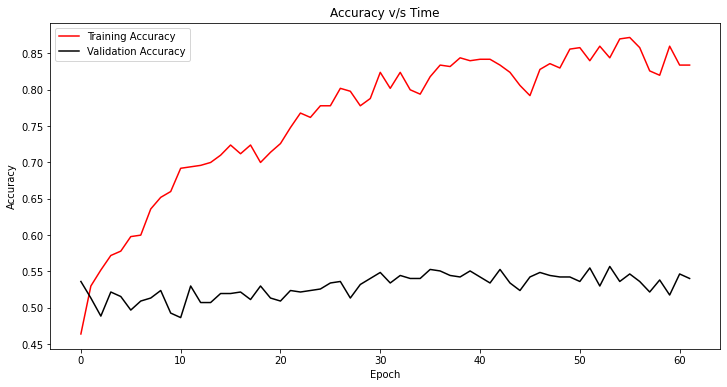

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##CNN

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, trainable=False))
model.add(tf.keras.layers.Conv1D(64,5,activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 300,validation_data=(X_test_dl,y_test),callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

In [ ]:
model.evaluate(X_test_dl,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##RNN

###LSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.LSTM(16, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
# model.add(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 300,validation_data=(X_test_dl,y_test),callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

In [ ]:
model.evaluate(X_test_dl,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

###Bi-LSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
# model.add(tf.keras.Bidirectional(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.1)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 500,validation_data=(X_test_dl,y_test),callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

In [ ]:
model.evaluate(X_test_dl,y_test)

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

##CNN+LSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(90000, 32, input_length=max_length))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Conv1D(56,5,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.Conv1D(56,3,activation='relu',padding='same'))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2,from_logits=False),optimizer=keras.optimizers.Adam(learning_rate=0.002529),metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 32)            2880000   
                                                                 
 spatial_dropout1d_15 (Spati  (None, 30, 32)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_10 (Conv1D)          (None, 30, 56)            9016      
                                                                 
 spatial_dropout1d_16 (Spati  (None, 30, 56)           0         
 alDropout1D)                                                    
                                                                 
 lstm_10 (LSTM)              (None, 30, 8)             2080      
                                                                 
 conv1d_11 (Conv1D)          (None, 30, 56)           

In [ ]:
epochs=1000
history=model.fit(X_train_dl, y_train, epochs=epochs, batch_size = 300, validation_split=0.1, callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    min_delta=0,
    patience=25,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)])

Epoch 1/1000
573/573 [==============================] - 144s 251ms/step - loss: 0.1336 - binary_accuracy: 0.7347 - val_loss: 0.1183 - val_binary_accuracy: 0.7864
Epoch 2/1000
573/573 [==============================] - 97s 170ms/step - loss: 0.1064 - binary_accuracy: 0.8143 - val_loss: 0.1219 - val_binary_accuracy: 0.7840
Epoch 3/1000
573/573 [==============================] - 100s 175ms/step - loss: 0.0919 - binary_accuracy: 0.8440 - val_loss: 0.1316 - val_binary_accuracy: 0.7786
Epoch 4/1000
573/573 [==============================] - 98s 171ms/step - loss: 0.0809 - binary_accuracy: 0.8654 - val_loss: 0.1402 - val_binary_accuracy: 0.7700
Epoch 5/1000
573/573 [==============================] - 98s 171ms/step - loss: 0.0724 - binary_accuracy: 0.8803 - val_loss: 0.1609 - val_binary_accuracy: 0.7669
Epoch 6/1000
573/573 [==============================] - 100s 174ms/step - loss: 0.0653 - binary_accuracy: 0.8939 - val_loss: 0.1905 - val_binary_accuracy: 0.7617
Epoch 7/1000
573/573 [=========

In [ ]:
model.evaluate(X_test_dl,y_test)

663/663 [==============================] - 6s 9ms/step - loss: 0.3245 - binary_accuracy: 0.7468


[0.32445940375328064, 0.746780514717102]

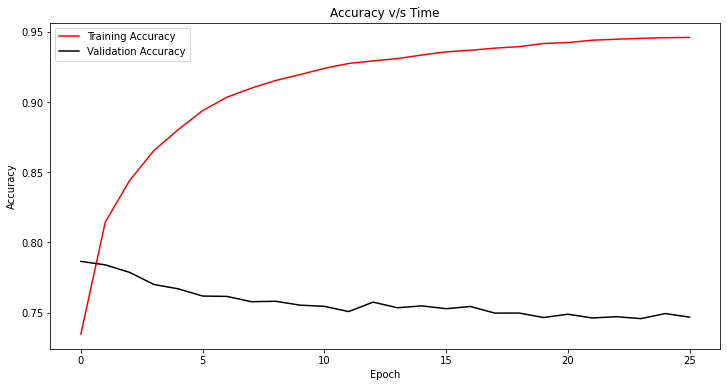

In [ ]:
plt.figure(figsize=(12,6))
epochs = len(history.history['binary_accuracy'])
plt.plot(range(epochs),history.history['binary_accuracy'],label='Training Accuracy',color='r')
plt.plot(range(epochs),history.history['val_binary_accuracy'],label='Validation Accuracy',color='black')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy v/s Time')

plt.show()

In [ ]:
y_pred=model.predict(X_test_dl)

663/663 [==============================] - 6s 9ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0
y_pred=np.array(y_pred).astype(int)
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74     10485
           1       0.75      0.75      0.75     10714

    accuracy                           0.75     21199
   macro avg       0.75      0.75      0.75     21199
weighted avg       0.75      0.75      0.75     21199



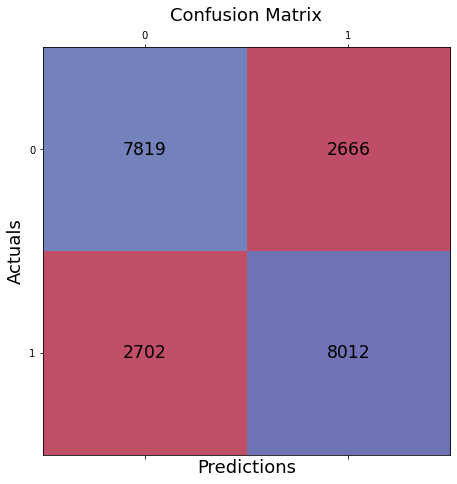

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap='RdYlBu', alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

##Hyperparameter tunimg using keras tuner

In [ ]:
!pip install keras-tuner --quiet

In [ ]:
import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time

LOG = f'{int(time.time())}'

In [ ]:
def call_existing_code(vocab_size, embedding_dim, conv_units, lstm_units, activation):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
  # if dropout:
  #   model.add(tf.keras.layers.SpatialDropout1D(0.25))
  model.add(tf.keras.layers.Conv1D(filters=conv_units, kernel_size=5, activation=activation, padding='same'))
  # if dropout:
  #   model.add(tf.keras.layers.SpatialDropout1D(0.25))
  model.add(tf.keras.layers.LSTM(units=lstm_units, return_sequences=True))
  model.add(tf.keras.layers.Conv1D(filters=conv_units, kernel_size=3, activation=activation, padding='same'))
  # if dropout:
  #   model.add(tf.keras.layers.SpatialDropout1D(0.25))
  model.add(tf.keras.layers.LSTM(units=lstm_units, return_sequences=False))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.1))
  # model.add(tf.keras.layers.Dense(8, activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=1,from_logits=False),optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=[tf.keras.metrics.BinaryAccuracy()])
  return model


def build_model(hp):
    vocab_size=hp.Int("vocab_size", min_value=75000, max_value=90000, step=5000)
    embedding_dim=hp.Int("em_dim", min_value=64, max_value=128, step=64)
    conv_units = hp.Int("conv_units", min_value=8, max_value=32, step=8)
    lstm_units = hp.Int("lstm_units", min_value=16, max_value=32, step=4)
    activation = hp.Choice("activation", ["relu", "tanh"])
    # dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        vocab_size=vocab_size, embedding_dim=embedding_dim, conv_units=conv_units, lstm_units=lstm_units, activation=activation
    )
    return model

tuner=RandomSearch(
    build_model,
    objective="val_binary_accuracy",
    max_trials=5,
    executions_per_trial=5,
    directory=LOG
)

tuner.search(
    x=X_train_dl,
    y=y_train,
    epochs=5,
    batch_size=500,
    validation_data=(X_test_dl,y_test)
)

print(tuner.get_best_hyperparameters()[0].values)
best_model = tuner.get_best_models()[0]
best_model.summary()

Trial 5 Complete [00h 02m 49s]
val_binary_accuracy: 0.7838414072990417

Best val_binary_accuracy So Far: 0.7850930690765381
Total elapsed time: 00h 14m 13s
{'vocab_size': 75000, 'em_dim': 64, 'conv_units': 32, 'lstm_units': 28, 'activation': 'relu', 'lr': 0.004662173581831988}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 64)            4800000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            10272     
                                                                 
 lstm (LSTM)                 (None, 30, 28)            6832      
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 32)            2720      


 lstm_1 (LSTM)               (None, 28)                6832      


 flatten (Flatten)           (None, 28)                0         


 dense (Dense)               (None, 1)                 29        
                                                                 
Total params: 4,826,685
Trainable params: 4,826,685
Non-trainable params: 0
_________________________________________________________________
